## How to Create an Animated Polyline with a Basemap in Python: A Step-by-Step Tutorial
by A Baig

In this tutorial, you’ll learn how to create an animated polyline overlaid on a basemap using Python. This process involves using libraries such as geopandas, matplotlib, contextily, and FuncAnimation.

### Step 1: Pre Requisites (Software & Python Libraries)

I have made this code in Spyder, Anaconda. You can either install it using pip, or if you are in an Anaconda Environment, you can use conda. After installation, import the required libraries into your python editor.



In [1]:
# %pip install geopandas matplotlib contextily ffmpeg-python

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import contextily as ctx

### Step 2: Load the Shapefile
A shapefile containing the polyline data is required. Use geopandas to load it:

In [3]:
import fiona

# Enable SHAPE_RESTORE_SHX to recreate the .shx file if missing
fiona.Env().options.update(SHAPE_RESTORE_SHX="YES")

# Attempt to load the shapefile directly
gdf = gpd.read_file('san_francisco_locations copy.shp')

### Step 3: Convert the Coordinate Reference System (CRS)
To overlay the polyline on a basemap, the shapefile’s CRS must match the basemap’s CRS. Transform the CRS to EPSG:4326 (WGS84):

In [4]:
# Set the CRS of the GeoDataFrame to match the input shapefile
gdf = gdf.set_crs(epsg=4326)

# Transform to Web Mercator for the basemap
gdf = gdf.to_crs(epsg=3857)

### Step 4: Extract Polyline Coordinates
Make sure your polyline shapefile is a single polyline. If it has multiple sections, you may merge it before using it. Now, we will extract its coordinates for animation:

In [5]:
# Extract coordinates
polyline = gdf.geometry[0]  # assuming you have a single polyline
x, y = polyline.xy

### Step 5: Set Up the Plot
Define a high-resolution figure and set the plot limits to the shapefile’s bounds:

(4544788.631635373, 4554973.178715968)

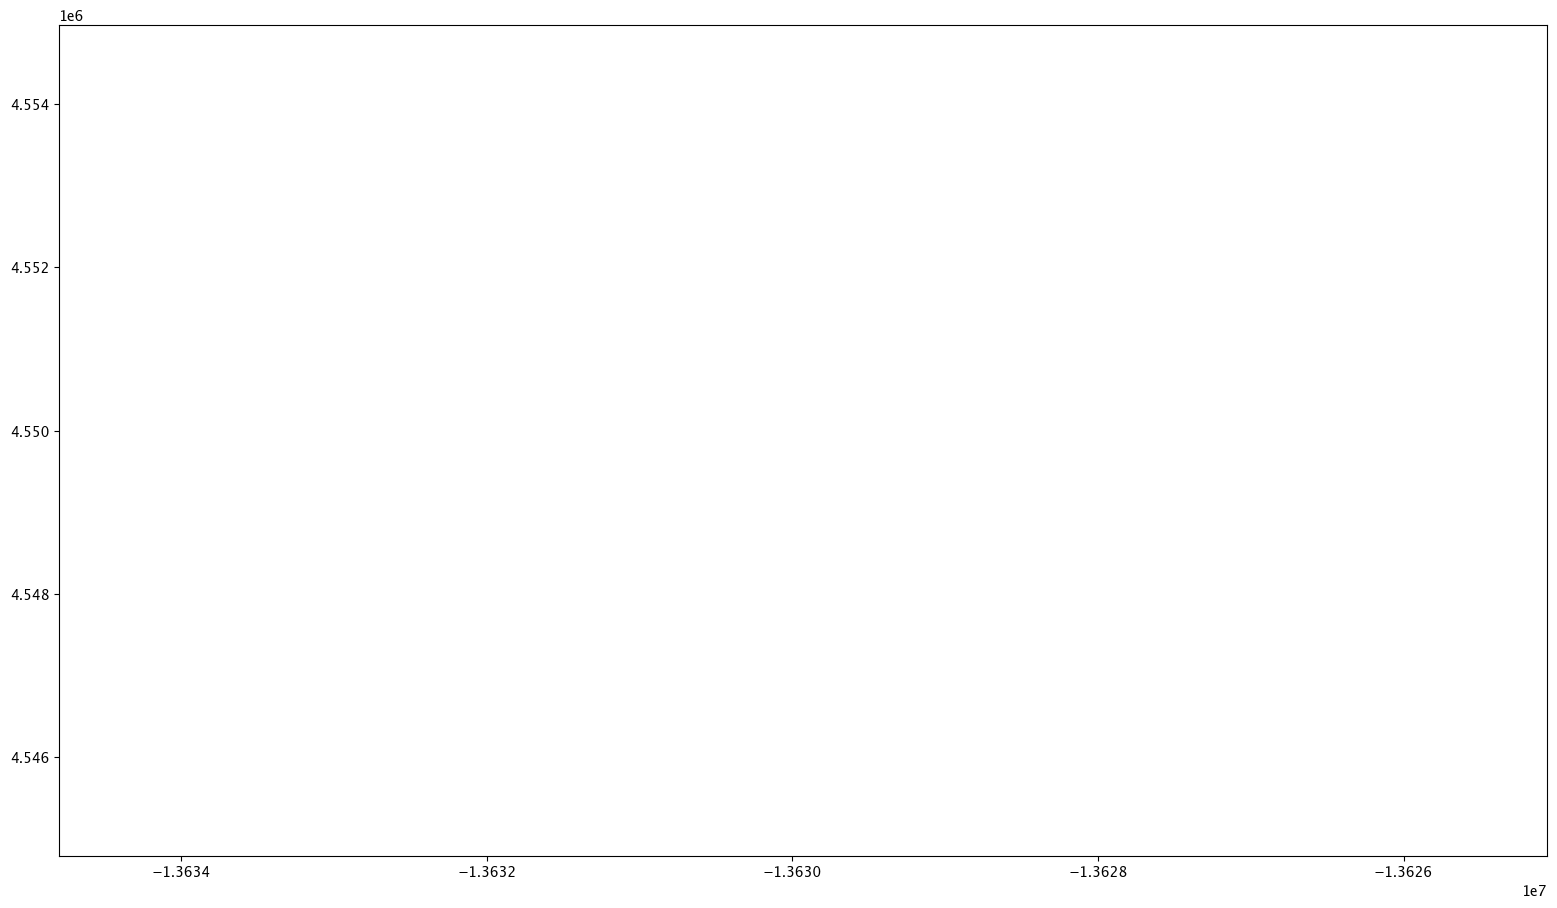

In [6]:
fig, ax = plt.subplots(figsize=(19.2, 10.8))  # 1080p resolution

# Zoom to the shapefile extent
minx, miny, maxx, maxy = gdf.total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

### Step 6: Add a Basemap
Use the contextily library to add an OpenStreetMap basemap. You can change the basemap type (Read more — https://contextily.readthedocs.io/en/latest/index.html):

In [7]:
# Add a basemap
ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

# Remove x and y axis
ax.axis('off')

(np.float64(-13634800.850577924),
 np.float64(-13625060.395133512),
 np.float64(4544788.631635373),
 np.float64(4554973.178715968))

<Figure size 640x480 with 0 Axes>

### Step 7: Initialize the Animation
Set up an empty line object that will be updated during the animation:

In [8]:
# Initialize an empty line object
line, = ax.plot([], [], lw=2, color='blue')

# Initialization function
def init():
    line.set_data([], [])
    return line,

### Step 8: Define the Animation Function
Define how the polyline should update frame by frame:

In [9]:
# Animation function
def animate(i):
    line.set_data(x[:i], y[:i])
    return line,

### Step 9: Create and Save the Animation
Generate the animation using FuncAnimation and save it as a high-resolution video. You must note that higher the dpi value, more time it will take to render the animation and save video. The rendered video will be saved in the same folder as of your python file.:

In [10]:
# filepath: /Users/ulrike_imac_air/projects/maps/matplotlibs/AnimatedPolyline.ipynb
from matplotlib.animation import FFMpegWriter

# Create the animation with a higher frame rate to increase speed
anim = FuncAnimation(fig, animate, init_func=init,
                     frames=len(x), interval=15, blit=True)  # Decrease interval to speed up

# Save the animation as a high-resolution video using FFMpegWriter
writer = FFMpegWriter(fps=30, metadata=dict(artist='Me'), bitrate=1800)
anim.save('polyline_animation_context.mp4', writer=writer, dpi=200)

### Step 10: Optional — Display the Animation
If you’d like to preview the animation in your Python environment:

In [11]:
# Display the animation
plt.show()